### Introduction

This step focuses on collecting the data, organizing it, and making sure it's well defined. 

The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
* `toxic`
* `severe_toxic`
* `obscene`
* `threat`
* `insult`
* `identity_hate`

### Objective

Create a model which predicts a probability of each type of toxicity for each comment.

### Import Libraries

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import matplotlib as mpl

sns.set()
mpl.rcParams['figure.dpi'] = 100

### Data Collection

Goal: Organize data to streamline the next steps.

In [9]:
raw_train_data = pd.read_csv("../data/train.csv")
raw_train_data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
29968,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1
20812,36ef3052d057579e,"""\n\nIf you're interested in making currency a...",0,0,0,0,0,0
17262,2d94344c9dcb26dc,"Well, I'm going to take a break from this to c...",0,0,0,0,0,0
3240,08be056b71d3c82b,If not please rad recommendation here,0,0,0,0,0,0
135222,d33b7dc3a7cbe840,"""\n\nFirst of all I have nothing against you o...",0,0,0,0,0,0


In [10]:
# call info to see a summary of the data
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Explore The Data

In [11]:
# Here is an example of a comment
raw_train_data['comment_text'][random.randint(0, raw_train_data.shape[0])]

'I agree with Globe. He has my support.'

In [12]:
comments_len = raw_train_data['comment_text'].str.len()

Variation in the length of comments

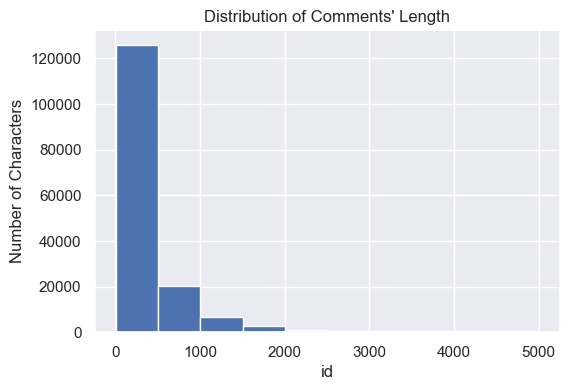

In [15]:
plt.hist(comments_len)
plt.title("Distribution of Comments' Length")
plt.xlabel("id")
plt.ylabel("Number of Characters")
plt.show()

Descriptive statistics of the comments' length

In [18]:
print(comments_len.describe())

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64


In [19]:
raw_train_data.shape

(159571, 8)